# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

!pip install citipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=815904f58961c4a2998c3d4d51e2fa3dfc2b65d841f629c3c1afb38fbc505f0b
  Stored in directory: /root/.cache/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [2]:
from google.colab import files
files.upload()

Saving api_keys.py to api_keys.py


{'api_keys.py': b'# OpenWeatherMap API Key\nweather_api_key = "e925cf60221f13323ed304efcc6dc251"\n\n# Geoapify API Key\ngeoapify_key = "e925cf60221f13323ed304efcc6dc251"\n'}

In [3]:
from google.colab import files
files.upload()


Saving cities.csv to cities.csv


{'cities.csv': b'City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date\n0,faya,18.3851,42.4509,22.06,35,21,2.6,SA,1666108228\n1,farsund,58.0948,6.8047,13.3,100,0,7.65,NO,1666108228\n2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230\n3,jamestown,42.097,-79.2353,5.77,77,100,9.77,US,1666107934\n4,lanzhou,36.0564,103.7922,14.53,48,59,1.2,CN,1666108230\n5,ushuaia,-54.8,-68.3,8.81,81,75,3.09,AR,1666108231\n6,albany,42.6001,-73.9662,10.36,74,29,2.1,US,1666108231\n7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232\n8,sisimiut,66.9395,-53.6735,2.72,98,100,3.79,GL,1666108235\n9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236\n10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965\n11,nikolskoye,59.7035,30.7861,8.94,90,100,3.22,RU,1666108237\n12,trairi,-3.2778,-39.2689,31.07,51,34,8.09,BR,1666108038\n13,dobryanka,58.4619,56.4165,5.63,93,100,3.55,RU,1666108237\n14,qaanaaq,77.484,-69.3632,-17.32,74,86,3.36,GL,1666108238\n15,mataura,-46.192

In [4]:
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]
  # Append the City information into city_data list
       city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vinh
Processing Record 2 of Set 1 | christchurch
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | uturoa
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | santana
Processing Record 10 of Set 1 | espargos
City not found. Skipping...
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | kataragama
City not found. Skipping...
Processing Record 15 of Set 1 | carolina beach
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | bethanie
Processing Record 18 of Set 1 | leava
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | yellowknife
Process

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vinh,18.6667,105.6667,27.12,84,89,1.82,VN,1686094897
1,christchurch,-43.5333,172.6333,10.79,89,13,2.57,NZ,1686094104
2,longyearbyen,78.2186,15.6401,3.91,65,20,5.14,SJ,1686094898
3,cidreira,-30.1811,-50.2056,18.12,87,1,5.89,BR,1686094898
4,uturoa,-16.7333,-151.4333,26.60,69,90,6.87,PF,1686094898


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vinh,18.6667,105.6667,27.12,84,89,1.82,VN,1686094897
1,christchurch,-43.5333,172.6333,10.79,89,13,2.57,NZ,1686094104
2,longyearbyen,78.2186,15.6401,3.91,65,20,5.14,SJ,1686094898
3,cidreira,-30.1811,-50.2056,18.12,87,1,5.89,BR,1686094898
4,uturoa,-16.7333,-151.4333,26.60,69,90,6.87,PF,1686094898


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

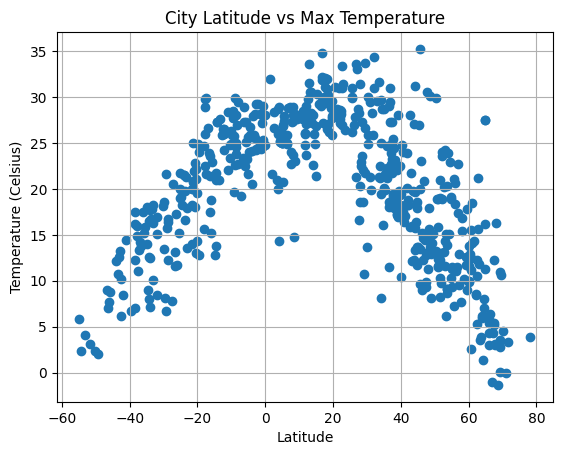

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude Vs. Humidity

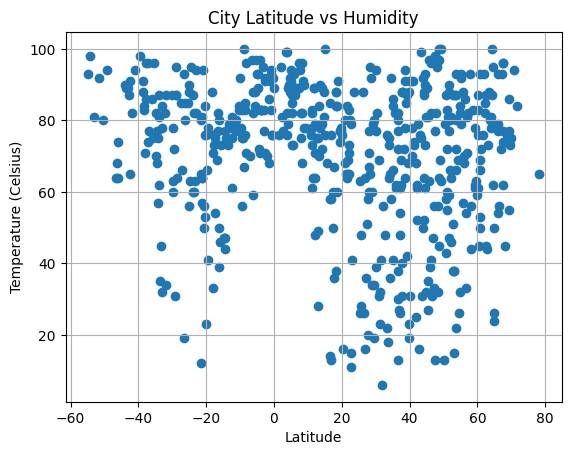

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

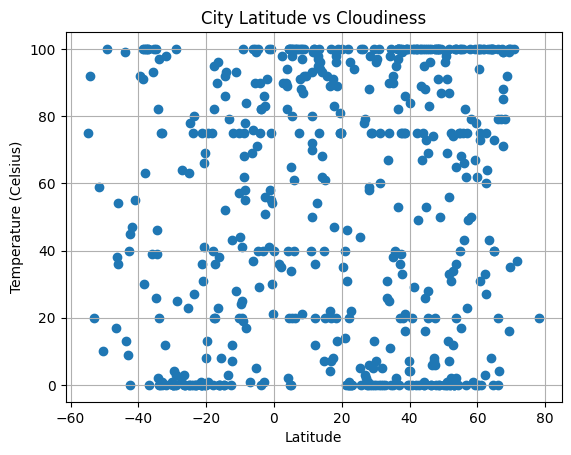

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

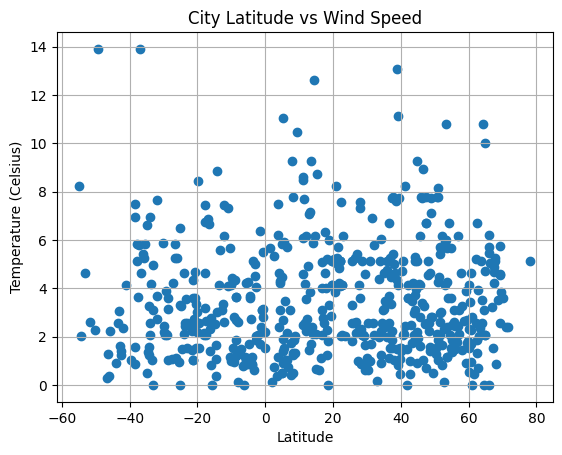

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.17386513214208774


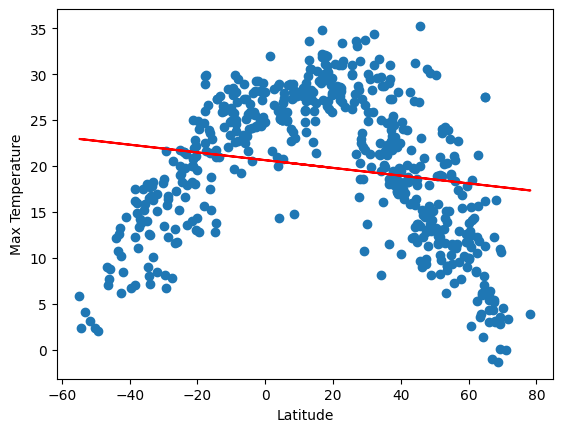

In [18]:
# Define a function to create Linear Regression plots

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vinh,18.6667,105.6667,27.12,84,89,1.82,VN,1686094897
2,longyearbyen,78.2186,15.6401,3.91,65,20,5.14,SJ,1686094898
5,bilibino,68.0546,166.4372,16.28,45,79,0.88,RU,1686094495
7,hawaiian paradise park,19.5933,-154.9731,27.73,77,75,5.14,US,1686094899
9,ilulissat,69.2167,-51.1000,0.01,86,100,2.57,GL,1686094899


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,christchurch,-43.5333,172.6333,10.79,89,13,2.57,NZ,1686094104
3,cidreira,-30.1811,-50.2056,18.12,87,1,5.89,BR,1686094898
4,uturoa,-16.7333,-151.4333,26.60,69,90,6.87,PF,1686094898
6,touros,-5.1989,-35.4608,25.71,83,5,4.26,BR,1686094580
8,santana,-0.0583,-51.1817,28.10,89,40,1.54,BR,1686094788


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.7585995720205179


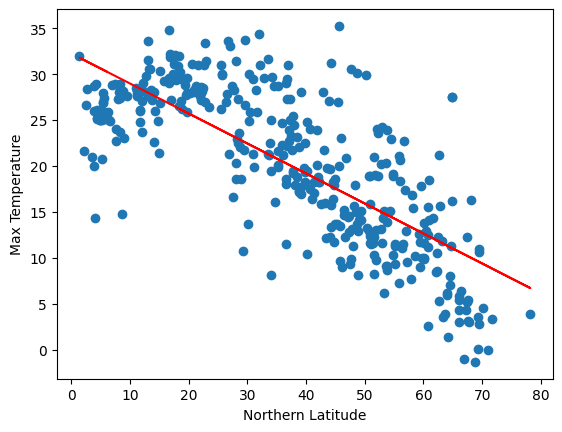

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.8525931051067663


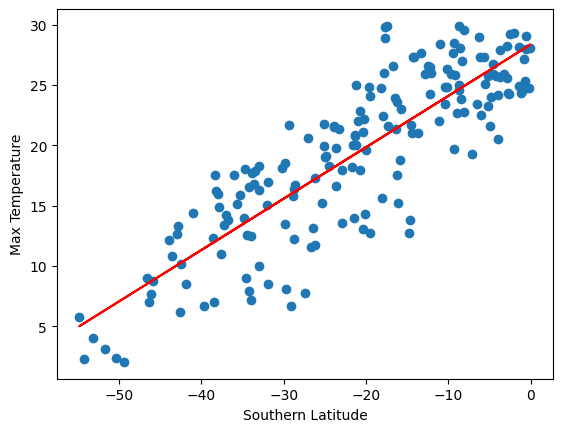

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

:**Discussion about the linear relationship: There is a significant relationship for Temperature and the Latitude.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.0940688401120326


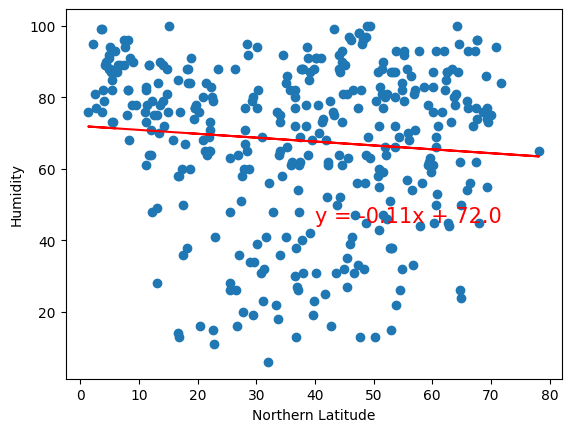

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.023160998039879203


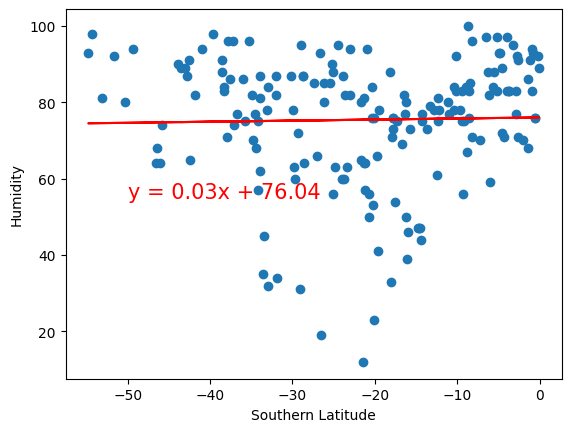

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship: There is no significant relationship for Humidity and the Latitude, the data is very spread out


---



### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.0359895879627711


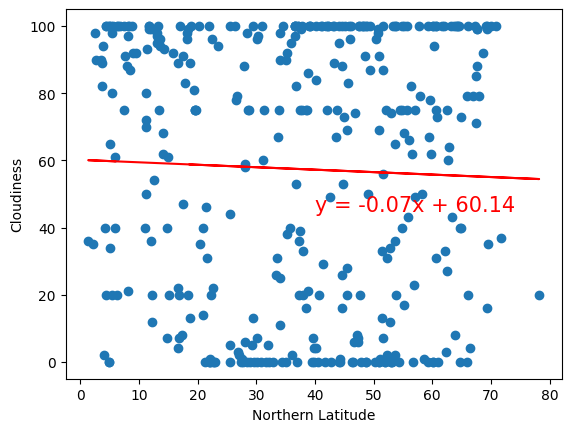

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.07757477404518169


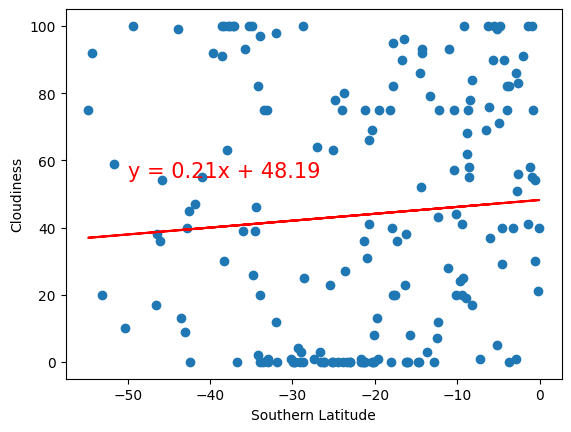

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

\**Discussion about the linear relationship: There is no significant relationship for Cloudiness and the Latitude, the data is very spread out

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.04594219902723567


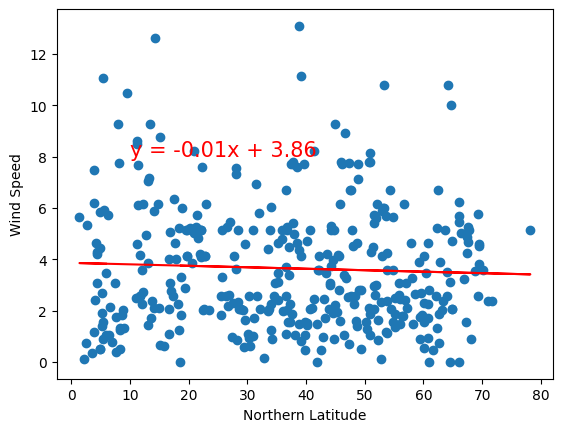

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.14555116212932365


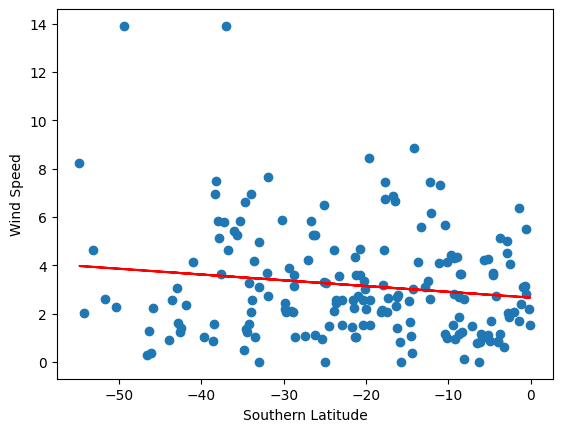

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship: There is a tight relationship for Cloudiness and the Latitude, there are outliers, but the data are mostly compacted together.